In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [7]:
df = pd.read_csv('Bridebook - DS - challengeData.1634399212.csv')
df.head(11)

,userId,regTime,testVariant,primaryAccount,regPage,device,app,browser,browserVersion,screenHeight,...,addedGuestCount,addedBudget,invitedCollaborator,addedNames,finOnb,searchCTA,venEnq,venSearch,venViews,sessions
0,0,1612810000000,0,True,/,Android,True,Chrome,77.0,823,...,True,True,False,True,1,0,0,0,0,6
1,1,1612110000000,1,True,/,Android,True,Chrome,76.0,732,...,True,True,False,True,1,0,0,0,0,2
2,2,1612480000000,2,True,/,iPhone,True,Mobile Safari,NaN,812,...,True,False,True,True,1,1,1,14,16,1
3,3,1612680000000,1,True,/,iPhone,True,Mobile Safari,NaN,667,...,True,True,True,True,1,1,0,4,4,3
4,4,1613010000000,0,True,/,Android,True,Chrome,77.0,740,...,False,True,False,True,1,0,0,0,0,1
5,5,1611960000000,0,True,/,iPad,True,Mobile Safari,NaN,1024,...,True,True,False,True,1,1,0,3,0,1
6,6,1612180000000,2,True,/,iPhone,True,Mobile Safari,NaN,736,...,False,False,False,True,1,0,0,0,0,1
7,7,1612200000000,0,True,/,Android,True,Chrome,76.0,869,...,False,True,False,True,1,0,0,0,0,1
8,8,1612550000000,0,True,/,Android,True,Chrome,76.0,780,...,True,True,True,True,1,0,0,0,0,1
9,9,1612980000000,1,True,/,iPhone,True,Mobile Safari,NaN,736,...,True,True,True,True,1,1,1,2,1,2


# **EDA:Exploratory Data Analysis**

In [8]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  1051
Number of Columns:  25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userId               1051 non-null   int64  
 1   regTime              1051 non-null   int64  
 2   testVariant          1051 non-null   int64  
 3   primaryAccount       1051 non-null   bool   
 4   regPage              1051 non-null   object 
 5   device               1051 non-null   object 
 6   app                  1051 non-null   bool   
 7   browser              1051 non-null   object 
 8   browserVersion       409 non-null    float64
 9   screenHeight         1051 non-null   int64  
 10  screenWidth          1051 non-null   int64  
 11  authMethod           1051 non-null   object 
 12  locationStep         1051 non-null   object 
 13  addedCity            1051 non-null   int64  
 14  locationCountry      442 non-null    object 
 15  addedGuestCount      1051 non-null   b

In [10]:
df.describe()

,userId,regTime,testVariant,browserVersion,screenHeight,screenWidth,addedCity,finOnb,searchCTA,venEnq,venSearch,venViews,sessions
count,1051.000000,1.051000e+03,1051.000000,409.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,661.509990,1.612531e+12,0.600381,76.655257,766.986679,401.732636,0.384396,0.915319,0.466223,0.871551,5.079924,5.049477,3.367269
std,322.209593,3.455717e+08,0.747160,0.734966,116.937459,98.457783,0.486684,0.278539,0.499095,2.625817,10.025552,11.576225,3.696618
min,0.000000,1.611910e+12,0.000000,70.000000,424.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,409.500000,1.612260e+12,0.000000,76.000000,667.000000,360.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,672.000000,1.612550e+12,0.000000,77.000000,740.000000,375.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,934.500000,1.612845e+12,1.000000,77.000000,846.000000,414.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,4.000000
max,1197.000000,1.613090e+12,2.000000,77.000000,1366.000000,1280.000000,1.000000,1.000000,1.000000,26.000000,92.000000,130.000000,28.000000


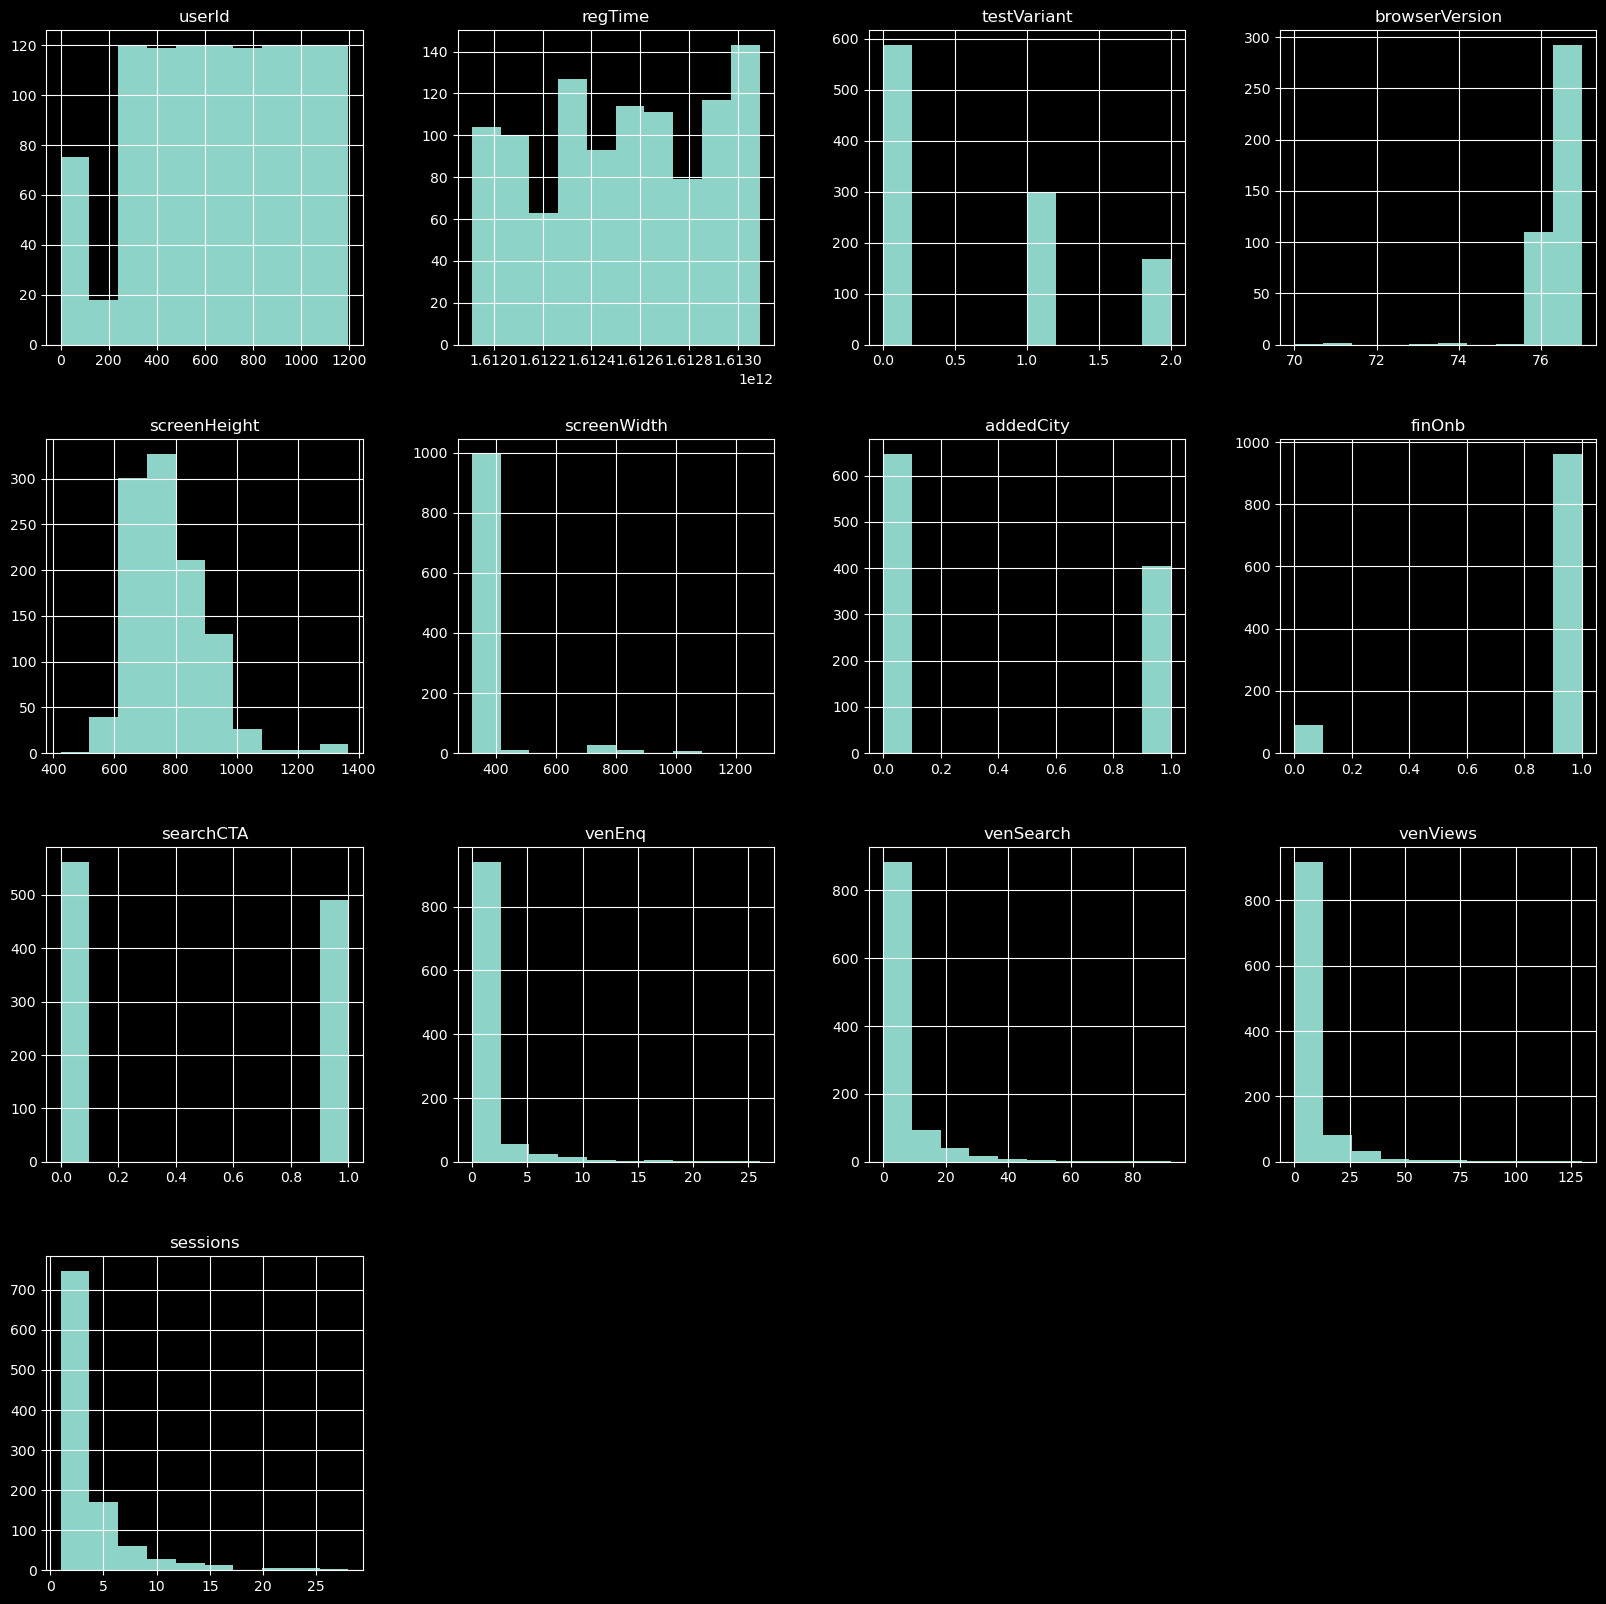

In [11]:
p = df.hist(figsize = (20,20))

In [12]:
df.isna().sum()

userId                   0
regTime                  0
testVariant              0
primaryAccount           0
regPage                  0
device                   0
app                      0
browser                  0
browserVersion         642
screenHeight             0
screenWidth              0
authMethod               0
locationStep             0
addedCity                0
locationCountry        609
addedGuestCount          0
addedBudget              0
invitedCollaborator      0
addedNames               0
finOnb                   0
searchCTA                0
venEnq                   0
venSearch                0
venViews                 0
sessions                 0
dtype: int64

In [13]:
df.corr()['testVariant'].sort_values()

sessions              -0.063704
venEnq                -0.029101
app                   -0.028630
screenWidth           -0.021805
addedGuestCount       -0.020201
userId                -0.008726
screenHeight          -0.007887
primaryAccount        -0.005040
venViews              -0.004208
venSearch              0.002234
addedNames             0.010597
finOnb                 0.020291
invitedCollaborator    0.028060
addedBudget            0.034372
searchCTA              0.042941
browserVersion         0.074665
addedCity              0.090218
regTime                0.255130
testVariant            1.000000
Name: testVariant, dtype: float64

### featuring and correlations

<Axes: >

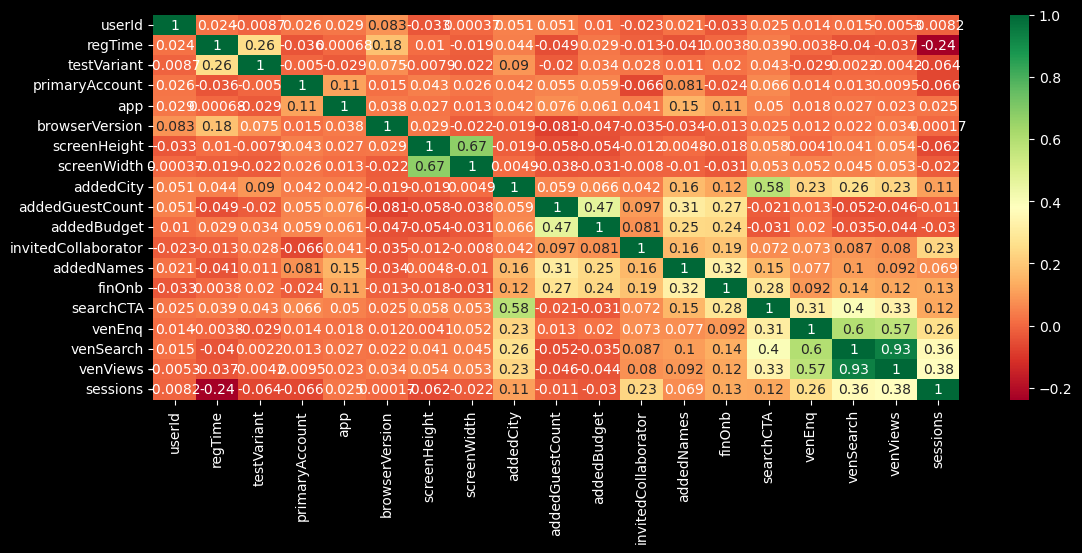

In [14]:
plt.figure(figsize=(13,5))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [15]:
df.apply(lambda x: x.nunique())

userId                 1051
regTime                 108
testVariant               3
primaryAccount            2
regPage                   3
device                    3
app                       2
browser                   2
browserVersion            7
screenHeight             43
screenWidth              17
authMethod                3
locationStep              4
addedCity                 2
locationCountry           7
addedGuestCount           2
addedBudget               2
invitedCollaborator       2
addedNames                2
finOnb                    2
searchCTA                 2
venEnq                   22
venSearch                52
venViews                 57
sessions                 22
dtype: int64

In [16]:
df.isnull().sum()

userId                   0
regTime                  0
testVariant              0
primaryAccount           0
regPage                  0
device                   0
app                      0
browser                  0
browserVersion         642
screenHeight             0
screenWidth              0
authMethod               0
locationStep             0
addedCity                0
locationCountry        609
addedGuestCount          0
addedBudget              0
invitedCollaborator      0
addedNames               0
finOnb                   0
searchCTA                0
venEnq                   0
venSearch                0
venViews                 0
sessions                 0
dtype: int64

In [17]:
df.groupby(['testVariant','finOnb']).agg({'finOnb': lambda x: x.value_counts()})

finOnb
testVariant finOnb        
0           0           51
            1          536
1           0           27
            1          270
2           0           11
            1          156

In [18]:
df.groupby(['testVariant']).agg({'finOnb': 'mean'})

,finOnb
testVariant,
0,0.913118
1,0.909091
2,0.934132


In [19]:
df.groupby(['testVariant','searchCTA']).agg({'searchCTA': lambda x: x.value_counts()})

searchCTA
testVariant searchCTA           
0           0                321
            1                266
1           0                160
            1                137
2           0                 80
            1                 87

In [20]:
df.groupby(['testVariant']).agg({'searchCTA': 'mean'})

,searchCTA
testVariant,
0,0.453152
1,0.461279
2,0.520958


In [21]:
df.groupby(['testVariant']).agg({'venEnq': 'mean'})

,venEnq
testVariant,
0,0.921635
1,0.875421
2,0.688623


In [22]:
df.groupby(['testVariant']).agg({'venSearch': 'mean'})

,venSearch
testVariant,
0,5.287905
1,4.198653
2,5.916168


### in the next group by we can see that venue views are more higher to variant 2

In [23]:
df.groupby(['testVariant']).agg({'venViews': 'mean'})

,venViews
testVariant,
0,5.318569
1,4.114478
2,5.766467


In [24]:
df.groupby(['testVariant']).agg({'sessions': 'mean'})

,sessions
testVariant,
0,3.684838
1,2.734007
2,3.377246


## Continuing EDA with visualized insights

Text(0.5, 1.0, 'Tests per country')

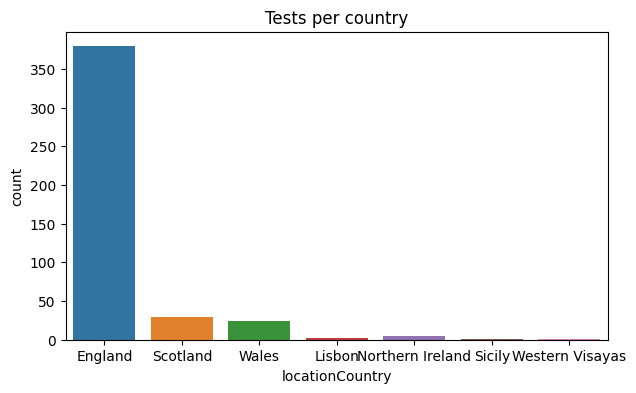

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="locationCountry", data=df)

plt.title("Tests per country")

### Most of the users are located in England. Scotland and Wales are potnetial countries for expansion plans!

Text(0.5, 1.0, 'browser')

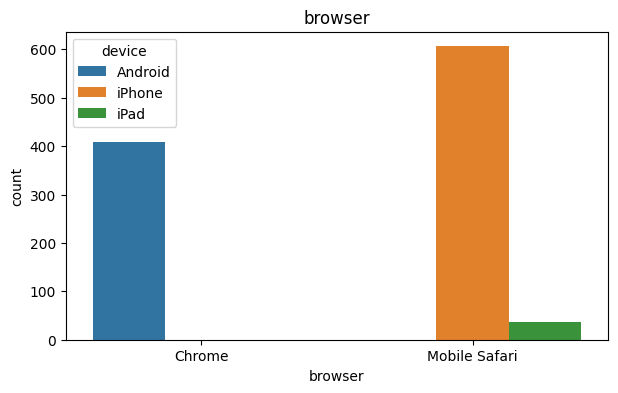

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="browser", hue="device", data=df)

plt.title("browser")

### Iphone(with safari) is the most common device used with around 600 users compared to around 400 users of Android(with chrome)

Text(0.5, 1.0, 'devices')

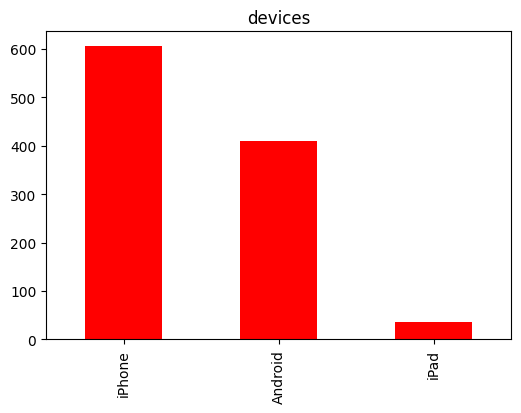

In [ ]:
plt.figure(figsize=(6,4))
df["device"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("devices")

## For the following insights, we will go through how the features are correlated with Finishing on Boarding and Search CTA. For each feature, we will discover the relation and then check the user ratios who used the feature.**

Text(0.5, 1.0, 'Added City')

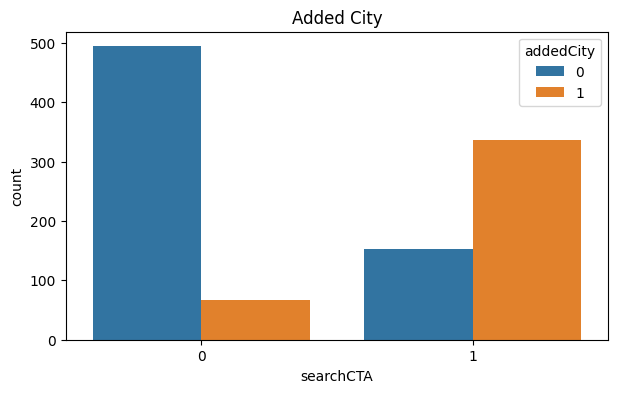

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="searchCTA", hue="addedCity", data=df)

plt.title("Added City")

Users who added city are more likely to use Search CTA and vice versa

Text(0.5, 1.0, 'addedCity')

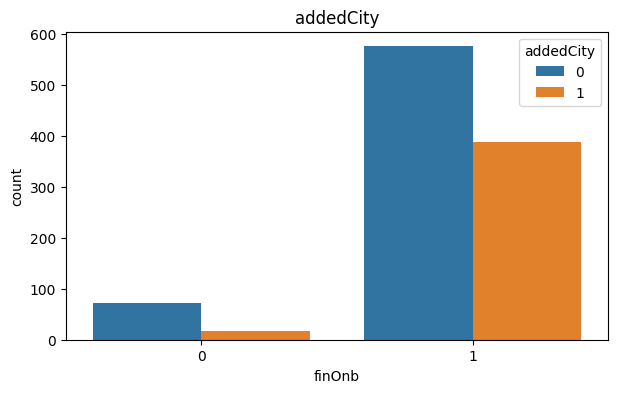

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="finOnb", hue="addedCity", data=df)

plt.title("addedCity")

Users who didn't add city are more likely to use finish on boarding!

In [1]:
plt.figure(figsize=(6,4))
df["locationStep"].value_counts()[:20].plot(kind="barh",color="Black")
plt.title("locationStep")

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Location Step')

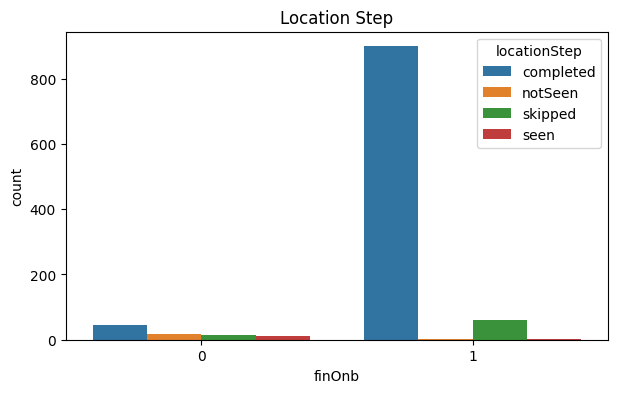

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="finOnb", hue="locationStep", data=df)

plt.title("Location Step")

Users who completed the location step city are more likely to use finish on boarding! with some percentage of people who skipped the location step.

Text(0.5, 1.0, 'Added Guest Count')

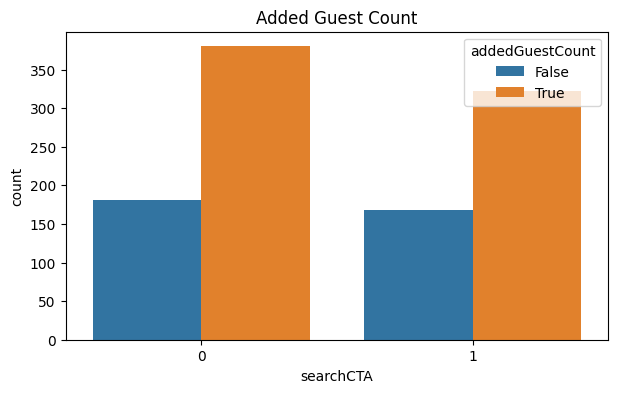

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="searchCTA", hue="addedGuestCount", data=df)

plt.title("Added Guest Count")

Text(0.5, 1.0, 'addedGuestCount')

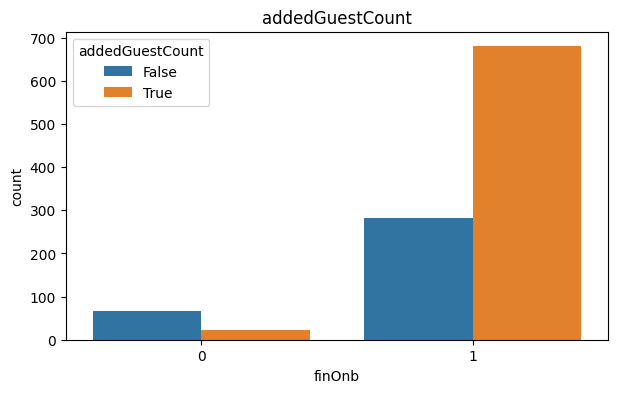

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="finOnb", hue="addedGuestCount", data=df)

plt.title("addedGuestCount")

Users who didn't add guest count are more likely to use finish on boarding!

Text(0.5, 1.0, 'addedGuestCount')

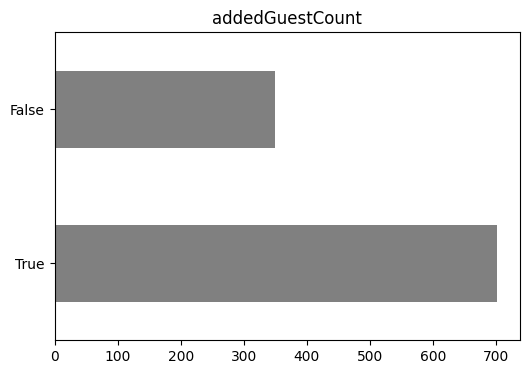

In [ ]:
plt.figure(figsize=(6,4))
df["addedGuestCount"].value_counts()[:20].plot(kind="barh",color="Grey")
plt.title("addedGuestCount")

Text(0.5, 1.0, 'addedBudget')

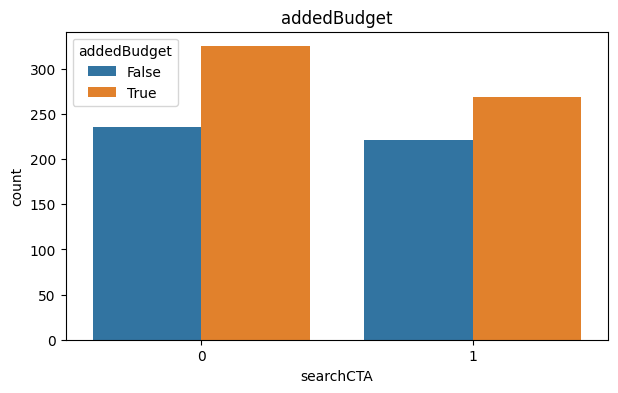

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="searchCTA", hue="addedBudget", data=df)

plt.title("addedBudget")

Text(0.5, 1.0, 'Added Budget')

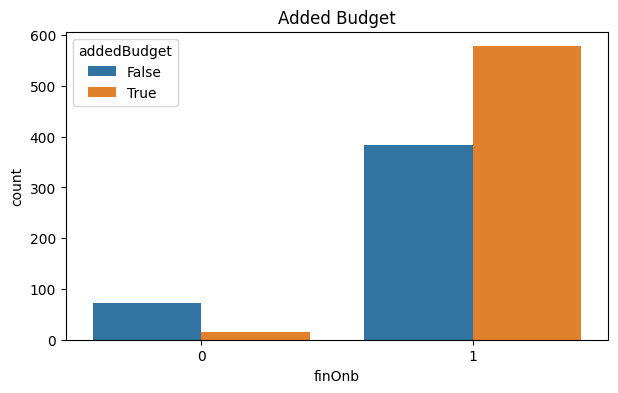

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="finOnb", hue="addedBudget", data=df)

plt.title("Added Budget")

Users who didn't add city are more likely to use finish on boarding!




Text(0.5, 1.0, 'addedBudget')

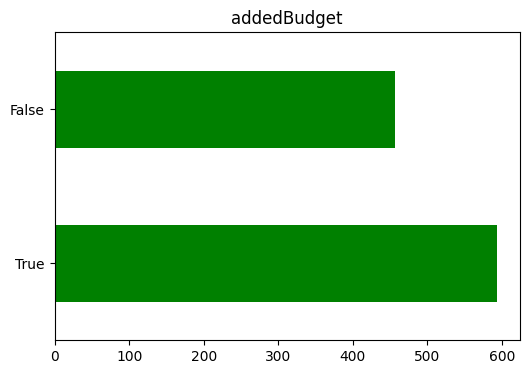

In [ ]:
plt.figure(figsize=(6,4))
df["addedBudget"].value_counts()[:20].plot(kind="barh",color="Green")
plt.title("addedBudget")

Text(0.5, 1.0, 'invitedCollaborator')

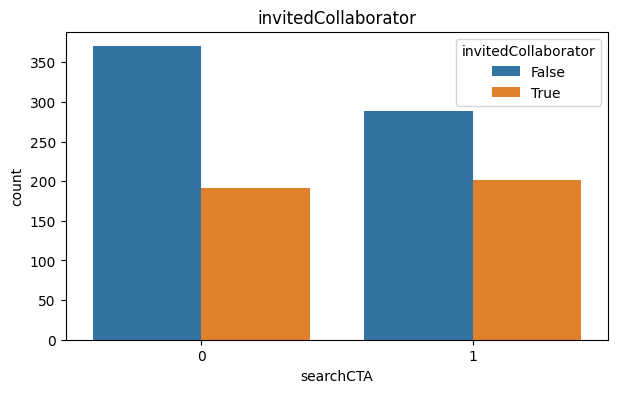

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="searchCTA", hue="invitedCollaborator", data=df)

plt.title("invitedCollaborator")

Text(0.5, 1.0, 'invitedCollaborator')

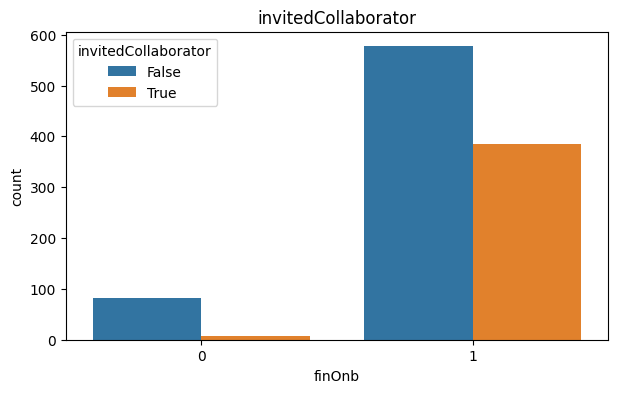

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="finOnb", hue="invitedCollaborator", data=df)

plt.title("invitedCollaborator")

Users who didn't invite collaborators are more likely to use finish on boarding!







Text(0.5, 1.0, 'invitedCollaborator')

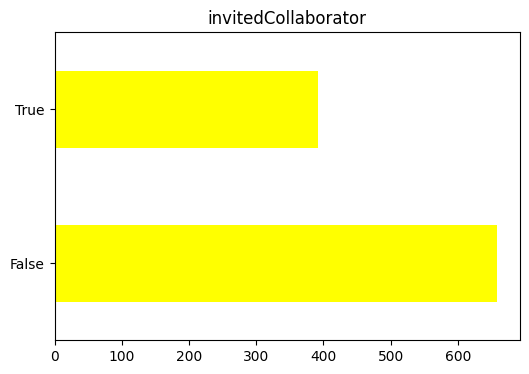

In [ ]:
plt.figure(figsize=(6,4))
df["invitedCollaborator"].value_counts()[:20].plot(kind="barh",color="Yellow")
plt.title("invitedCollaborator")

Text(0.5, 1.0, 'addedNames')

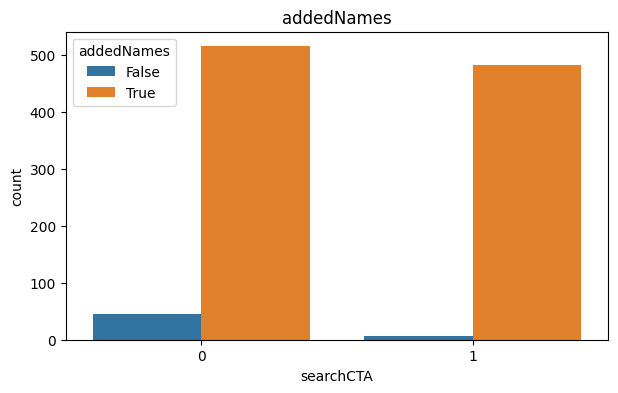

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="searchCTA", hue="addedNames", data=df)

plt.title("addedNames")

Text(0.5, 1.0, 'addedNames')

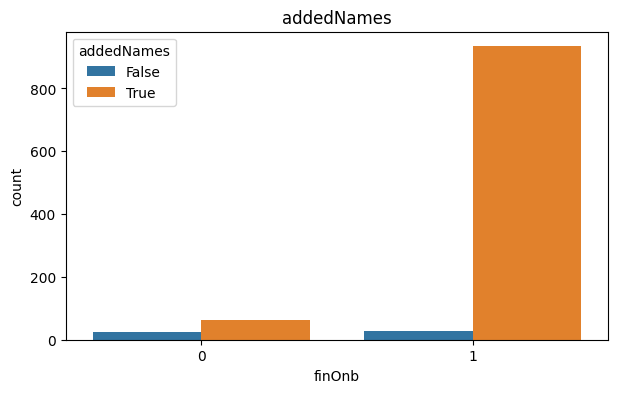

In [ ]:
fig=plt.figure(figsize=(7, 4))

sns.countplot(x="finOnb", hue="addedNames", data=df)

plt.title("addedNames")

Users who added names are more likely to use finish on boarding!


Text(0.5, 1.0, 'addedNames')

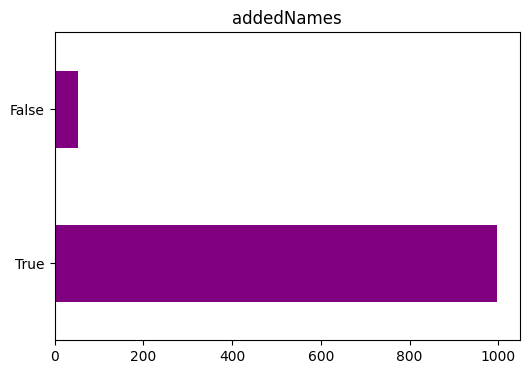

In [ ]:
plt.figure(figsize=(6,4))
df["addedNames"].value_counts()[:20].plot(kind="barh",color="Purple")
plt.title("addedNames")

<Axes: xlabel='testVariant', ylabel='searchCTA'>

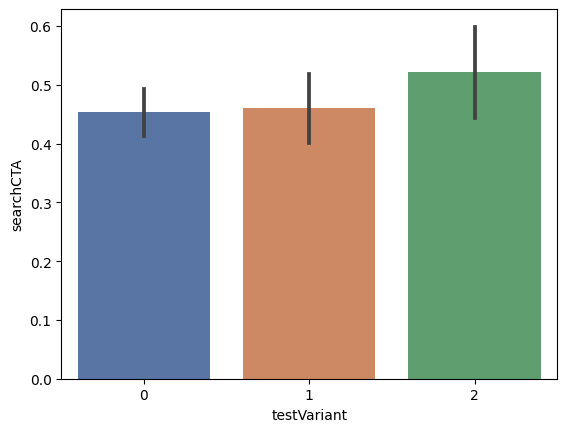

In [ ]:
sns.barplot(y=df.searchCTA, x=df.testVariant, palette="deep")

# ***AB Test* Demo**

Hypothesis
H0: There is not statistically significant difference between the old page and new page

H1: There is statistically significant difference between the old page and new page:

In [ ]:
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

In [ ]:
control = df[df['testVariant'] == 0]

In [ ]:
test_stat, pvalue = shapiro(control['finOnb'])
print('Test Stat = %.3f, p-value = %.50f' % (test_stat, pvalue))

Test Stat = 0.315, p-value = 0.00000000000000000000000000000000000000000594010419


In [ ]:
one = df[df['testVariant'] == 1]

In [ ]:
test_stat, pvalue = shapiro(one['finOnb'])
print('Test Stat = %.13f, p-value = %.50f' % (test_stat, pvalue))

Test Stat = 0.3237064480782, p-value = 0.00000000000000000000000000000012799715834267619283


In [ ]:
two = df[df['testVariant'] == 2]

In [ ]:
test_stat, pvalue = shapiro(two['finOnb'])
print('Test Stat = %.4f, p-value = %.50f' % (test_stat, pvalue))

Test Stat = 0.2668, p-value = 0.00000000000000000000000021651564512380995512384901


In [ ]:
test_stat, pvalue = shapiro(df.loc[df["testVariant"] == 1, "finOnb"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 1.279971583426762e-31
test_stat: 0.3237064480781555


In [ ]:
test_stat, pvalue = shapiro(df.loc[df["testVariant"] == 2, "finOnb"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 2.1651564512380996e-25
test_stat: 0.26684004068374634


In [ ]:
test_stat, pvalue = shapiro(df.loc[df["testVariant"] == 0, "finOnb"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 5.9401041902729e-42
test_stat: 0.31522947549819946
